##### In this mini project, i will apply decision tree algorithm in the famous dataset - titanic dataset to predict survival people based on features.

## Loading dataset

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

#### I'll drop some features to simply perform decision tree

## Clearning dataset

In [3]:
df1 = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns')
df1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


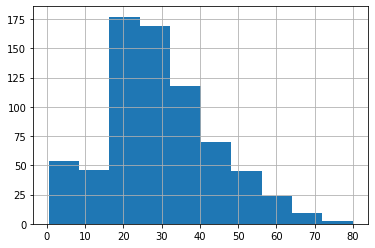

In [11]:
import matplotlib.pyplot as plt
df1.Age.hist()

In [17]:
177/891

0.19865319865319866

##### I see Age column has 177 null values, it takes approximately 20% of all dataset. So i do not want do drop age column, i'll fill nan value.

##### After visualing dataset, i can see its distribution, some people has more than 70 year olds, it can be seen as outliers. I'll do not fill it with mean value (it's affected by outliers), rather than i replace with median value (it's not affected by outliers)

## Feature engineering

In [19]:
age_median = df1.Age.median()

In [24]:
df1.Age = df1.Age.fillna(age_median)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


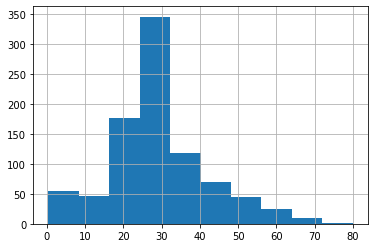

In [26]:
df1.Age.hist()

In [27]:
df1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


#### Almost ML algorithm can not understand non numeric data. Sex column has categorical data, so will convert it into number using LabelEncoder in sklearn library

In [28]:
from sklearn.preprocessing import LabelEncoder
le_age = LabelEncoder()

In [39]:
df1['Sex_le'] = le_age.fit_transform(df1.Sex)

In [40]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Sex_le
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


#### I drop Sex column

In [43]:
df1=df1.drop('Sex', axis='columns')

In [44]:
df1.head()

,Survived,Pclass,Age,Fare,Sex_le
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


##### Now my dataset looks great to apply ML, i'll do split dataset into 2 parts: train and test

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Survived', axis='columns'), df1['Survived'], test_size=0.3, random_state=1)

## Building decision tree

In [52]:
from sklearn import tree

In [53]:
clf = tree.DecisionTreeClassifier()

In [54]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
clf.score(X_test, y_test)

0.7350746268656716

##### I use the decision tree in sklearn by default, i'll change some paramter to increase the accuracy a bit

## Hyperparameter optimization

In [60]:
from sklearn.model_selection import RandomizedSearchCV
# criterion
criterion = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Create the random grid
# It's a dictionary with pair and key
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion': criterion}

print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini', 'entropy']}


In [61]:
clf = tree.DecisionTreeClassifier()
clf_randomcv = RandomizedSearchCV(estimator=clf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=100, n_jobs=-1)
# fit the randomized model
clf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.0s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [62]:
clf_randomcv.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=14)

In [63]:
clf_randomcv.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'gini'}

In [66]:
clf = tree.DecisionTreeClassifier(min_samples_split=14, min_samples_leaf=1, max_features='log2', max_depth=10, criterion='gini')


In [67]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=14)

In [68]:
clf.score(X_test, y_test)

0.7574626865671642

#### Wow, my model has better accuracy than previous one.